In [2]:
!pip install pandas

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 6.8 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.0 MB 7.3 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 6.5 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 6.4 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 6.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 6.8 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 7.2 MB/s  0:00:01

   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.6 MB 7.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 10.1 MB/s eta 0:00:01
   ------------------------ --------------- 5.8/9.6 MB 10.5 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 10.0 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 9.1 MB/s  0:00:01
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.8/38.5 MB 4.4 MB/s eta 0:00:09
   - -------------------------------------- 1.8/38.5 MB 4.6 MB/s eta 0:00:09
   -- ------------------------------------- 2.9/38.5 MB 4.7 MB/s eta 0:00:08
   --- ------------------------------------ 3.7/38.5 MB 4.7 MB/s eta 0:00:08
   ----- ---------------------------------- 5.0/38.5 MB 4.8 MB/s eta 0:00:07
   ------ ----------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install -U scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 241.4 kB/s eta 0:00:34
   -- ------------------------------------- 0.5/8.7 MB 241.4 kB/s eta 0:00:34
   -- ------------------------------------- 0.5/8.7 MB 241.4 kB/s eta 0:00:34
   -- ------------------------------------- 0.5/8.7 MB 241.4 kB/s eta 0:00:34
   --- ------------------------------------ 0.8/8.7 MB 273.2 kB/s eta 0:00:29
   --- ------------------------------------ 0.8/8.7 MB 273


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load both datasets
mz = pd.read_csv("nfhs5_subset_mz.csv")
hp = pd.read_csv("nfhs5_subset_hp.csv")

# Add a state label
mz["State"] = "Mizoram"
hp["State"] = "Himachal Pradesh"

# Combine both datasets
data = pd.concat([mz, hp], ignore_index=True)

# Select relevant variables
var1 = "educational attainment"
var2 = "type of toilet facility"

# Drop missing data
subset = data[[var1, var2, "State"]].dropna()

# Create a contingency table
contingency = pd.crosstab(subset[var1], subset[var2])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Interpretation
if p < 0.05:
    print("✅ Reject H₀: Education level and toilet facility are dependent.")
else:
    print("❌ Fail to reject H₀: Education level and toilet facility are independent.")

# Optional: view contingency table
print("\nContingency Table:")
print(contingency)


Chi-Square Statistic: 1561.5388384276312
Degrees of Freedom: 48
P-value: 1.1082757219840577e-295
✅ Reject H₀: Education level and toilet facility are dependent.

Contingency Table:
type of toilet facility   11    12    13  14  15  21   22  23   31  41  44  \
educational attainment                                                       
0                         40   626   375  11   4   5   78  74  133  12  22   
1                         38  1254   424  10   0   4   64  55  137  20  25   
3                        363  7553  1424  25   5  10  314  85  262  56  88   
4                         26   534    73   0   0   1   16   2   18   7   2   
5                        292  2119   334   5   2   0   62  14   31  14  20   

type of toilet facility  96   97  
educational attainment            
0                         8    9  
1                         7   11  
3                        13  211  
4                         0   18  
5                         4  198  


In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load datasets
mz = pd.read_csv("nfhs5_subset_mz.csv")
hp = pd.read_csv("nfhs5_subset_hp.csv")

# Define variables
var1 = "educational attainment"
var2 = "type of toilet facility"

for state_name, data in [("Mizoram", mz), ("Himachal Pradesh", hp)]:
    print(f"\n--- {state_name} ---")
    
    subset = data[[var1, var2]].dropna()
    contingency = pd.crosstab(subset[var1], subset[var2])
    
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    print("Chi-Square Statistic:", chi2)
    print("Degrees of Freedom:", dof)
    print("P-value:", p)
    
    if p < 0.05:
        print("✅ Reject H₀: Education level and toilet facility are dependent.")
    else:
        print("❌ Fail to reject H₀: Education level and toilet facility are independent.")



--- Mizoram ---
Chi-Square Statistic: 1315.5417548041771
Degrees of Freedom: 44
P-value: 6.592196935068665e-247
✅ Reject H₀: Education level and toilet facility are dependent.

--- Himachal Pradesh ---
Chi-Square Statistic: 816.1202337081843
Degrees of Freedom: 48
P-value: 2.760785044520369e-140
✅ Reject H₀: Education level and toilet facility are dependent.


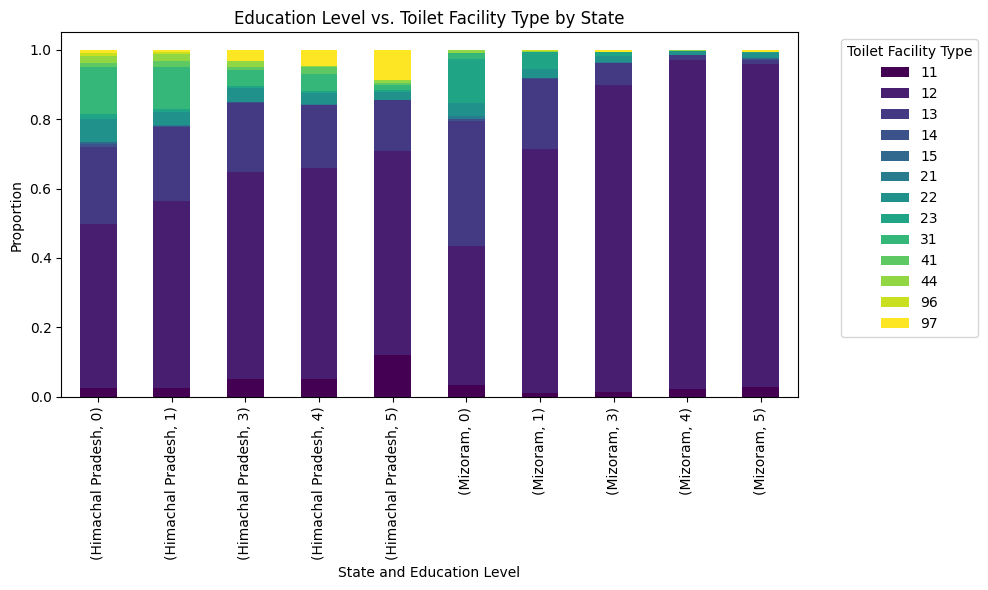

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your datasets
mz = pd.read_csv("nfhs5_subset_mz.csv")
hp = pd.read_csv("nfhs5_subset_hp.csv")

# Add labels
mz["State"] = "Mizoram"
hp["State"] = "Himachal Pradesh"

# Combine
data = pd.concat([mz, hp], ignore_index=True)

# Select variables
var1 = "educational attainment"
var2 = "type of toilet facility"

# Drop missing
subset = data[[var1, var2, "State"]].dropna()

# Group and compute proportions
cross_tab = pd.crosstab([subset["State"], subset[var1]], subset[var2], normalize='index')

# Plot stacked bar charts
cross_tab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')

plt.title("Education Level vs. Toilet Facility Type by State")
plt.xlabel("State and Education Level")
plt.ylabel("Proportion")
plt.legend(title="Toilet Facility Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


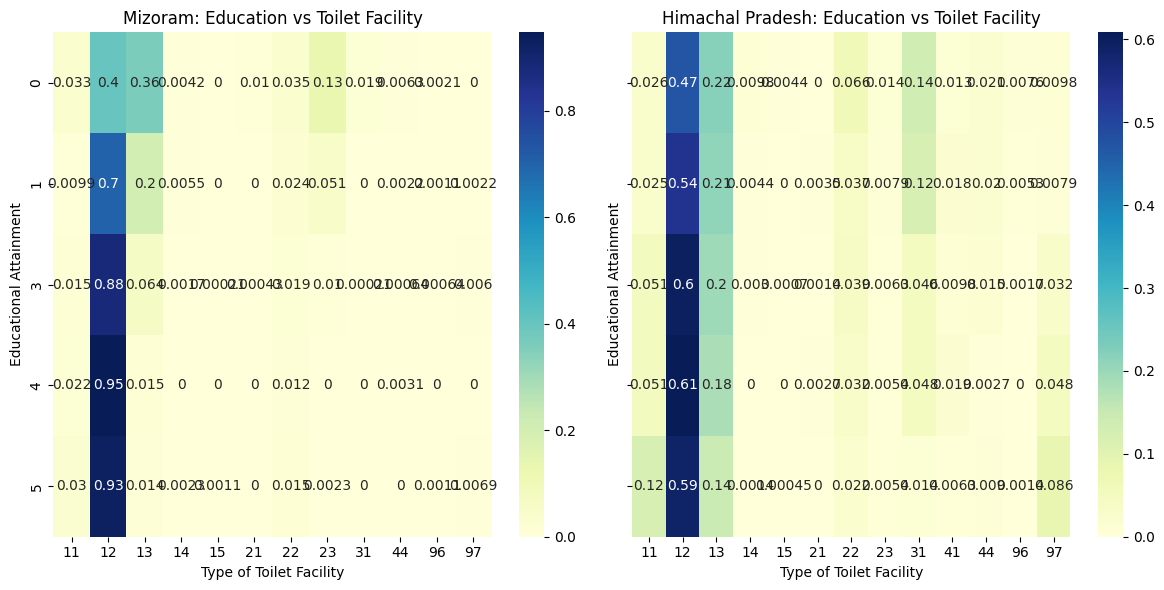

In [22]:
import seaborn as sns

# Create crosstabs per state
mz_tab = pd.crosstab(mz[var1], mz[var2], normalize='index')
hp_tab = pd.crosstab(hp[var1], hp[var2], normalize='index')

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

sns.heatmap(mz_tab, annot=True, cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Mizoram: Education vs Toilet Facility")

sns.heatmap(hp_tab, annot=True, cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Himachal Pradesh: Education vs Toilet Facility")

for ax in axes:
    ax.set_xlabel("Type of Toilet Facility")
    ax.set_ylabel("Educational Attainment")

plt.tight_layout()
plt.show()



--- Himachal Pradesh ---
F-Statistic: 868.6891106013652
P-Value: 0.0
✅ Reject H₀ — Mean children ever born differ by education level.

--- Mizoram ---
F-Statistic: 219.6152600245817
P-Value: 3.211039271632118e-178
✅ Reject H₀ — Mean children ever born differ by education level.


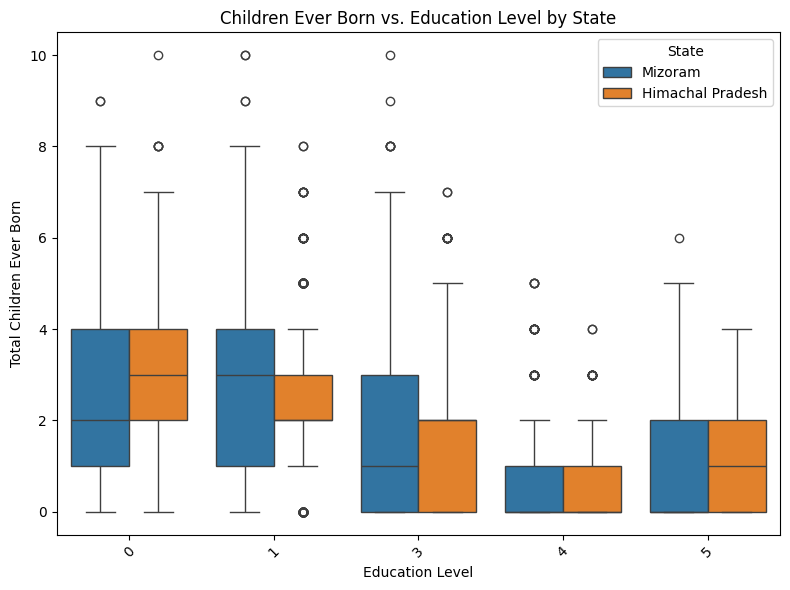

In [23]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
mz = pd.read_csv("nfhs5_subset_mz.csv")
hp = pd.read_csv("nfhs5_subset_hp.csv")

# Add state labels
mz["State"] = "Mizoram"
hp["State"] = "Himachal Pradesh"

# Combine
data = pd.concat([mz, hp], ignore_index=True)

# Variables
edu_col = "educational attainment"
child_col = "total children ever born"

# Drop missing
subset = data[[edu_col, child_col, "State"]].dropna()

# --- Run ANOVA state by state ---
for state_name, df in subset.groupby("State"):
    print(f"\n--- {state_name} ---")

    # Prepare groups based on education level
    groups = [group[child_col].values for name, group in df.groupby(edu_col)]

    # One-way ANOVA
    f_stat, p_val = stats.f_oneway(*groups)

    print("F-Statistic:", f_stat)
    print("P-Value:", p_val)

    if p_val < 0.05:
        print("✅ Reject H₀ — Mean children ever born differ by education level.")
    else:
        print("❌ Fail to reject H₀ — No significant difference found.")

# --- Optional: visualize ---
plt.figure(figsize=(8,6))
sns.boxplot(data=subset, x=edu_col, y=child_col, hue="State")
plt.xticks(rotation=45)
plt.title("Children Ever Born vs. Education Level by State")
plt.xlabel("Education Level")
plt.ylabel("Total Children Ever Born")
plt.tight_layout()
plt.show()
